# Regularized linear regression

La finalidad de este proyecto es descubrir que relación existe entre los recursos sanitarios y los datos socio demográficos, con lo que, para poder realizar el análisis es necesario que se establezca una variable objetivo (relacionada con la salud), esta variable objetivo se definirá al estudiar el conjunto de datos.

## Paso 1. Carga de Datos

In [174]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

## Paso 2. EDA

## Selección de variable objetivo (target)
Antes de realizar el EDA formalmente, se estudia el conjunto de datos y se establece la variable objetivo, que en este caso, será la variable <mark>"Total Hospitals (2019)</mark>", ya que, de acuerdo al análisis realizado, esta variable representa acceso básico a los servicios médicos y también, en zonas alejadas.
Otro añadido a la relevancia de este variable, es que se trata de datos recabados en el 2019, mientras que las variables features fueron recabadas en el 2018, esto es beneficioso para obtener mejores predicciones.

In [175]:
# Variable Objetivo
df["Total Hospitals (2019)"]

0       1.148905
1       4.505074
2       0.514126
3       0.462860
4       1.195171
          ...   
3135    2.160982
3136    1.158570
3137    1.018926
3138    0.395794
3139    0.349714
Name: Total Hospitals (2019), Length: 3140, dtype: float64

Con la finalidad de entender el conjunto de datos y sus variables, se realizará un análisis exploratorio de datos, como se sigue:

In [176]:
# Your code here
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [177]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Non-Null Count  Dtype  
---   ------                                                                         --------------  -----  
 0    fips                                                                           3140 non-null   int64  
 1    TOT_POP                                                                        3140 non-null   int64  
 2    0-9                                                                            3140 non-null   int64  
 3    0-9 y/o % of total pop                                                         3140 non-null   float64
 4    19-Oct                                                                         3140 non-null   int64  
 5    10-19 y/o % of total pop                                                       3140 non-null   float64
 6    20-29         

Del método info, podemos visualizar que hay dos variables que son de tipo object, esas dos variables son "COUNTY_NAME" y "STATE_NAME".

In [178]:
df["COUNTY_NAME"].unique()

array(['Autauga', 'Baldwin', 'Barbour', ..., 'Uinta', 'Washakie',
       'Weston'], shape=(1841,), dtype=object)

In [179]:
df["STATE_NAME"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [180]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


Una vez se realizó el EDA, se eliminarán las variables poco útiles en este caso y se quedarán las variables features o predictoras:

In [181]:
columns_to_keep = [1, 21, 23, 25, 27, 29, 31, 44, 70, 76, 80, 86, 103]
df = df.iloc[:, columns_to_keep]

In [182]:
df.shape

(3140, 13)

In [183]:
df.head()

,TOT_POP,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Bachelor's degree or higher 2014-18,Total Hospitals (2019),Population Aged 60+,STATE_FIPS,anycondition_number,CKD_prevalence
0,55601,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,10291,1.148905,10523,1,20181,3.1
1,218022,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,46075,4.505074,53519,1,68790,3.2
2,24881,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,2220,0.514126,6150,1,11325,4.5
3,22400,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,1813,0.462860,4773,1,9190,3.3
4,57840,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,5010,1.195171,13600,1,20584,3.4


## Análisis univariable

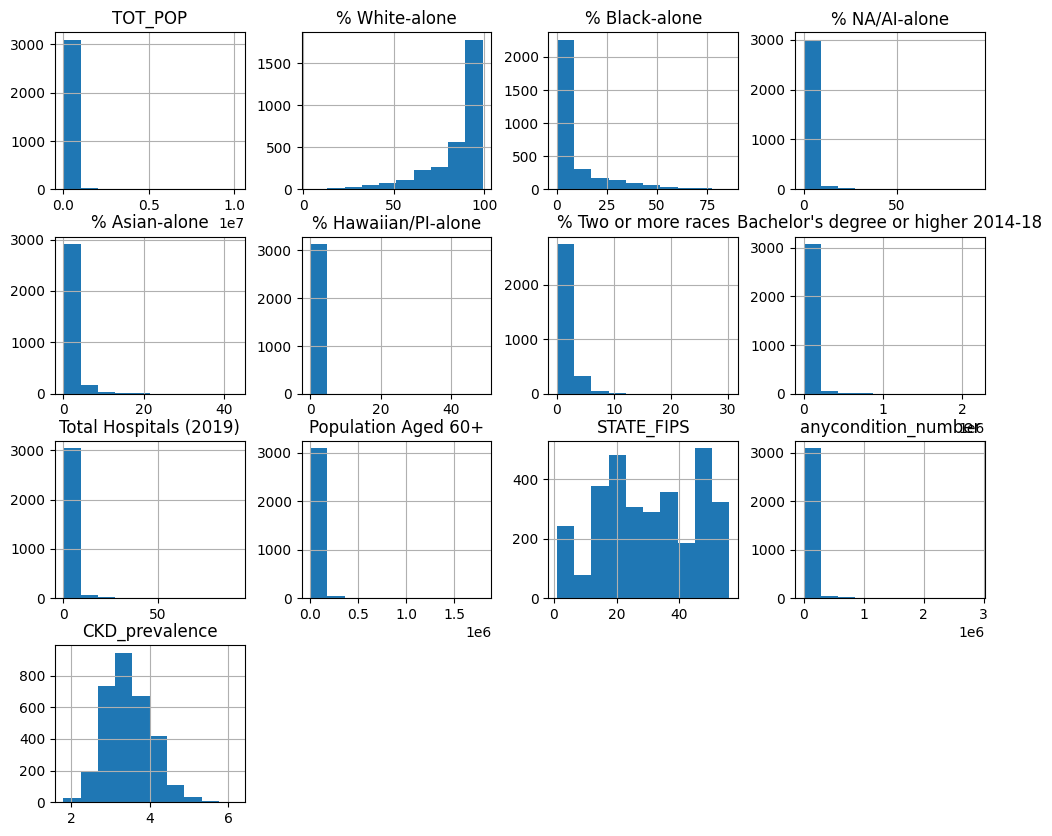

In [184]:
import matplotlib.pyplot as plt


df.hist(figsize=(12,10))
plt.show()

Se analizarán las relaciones entre variables:

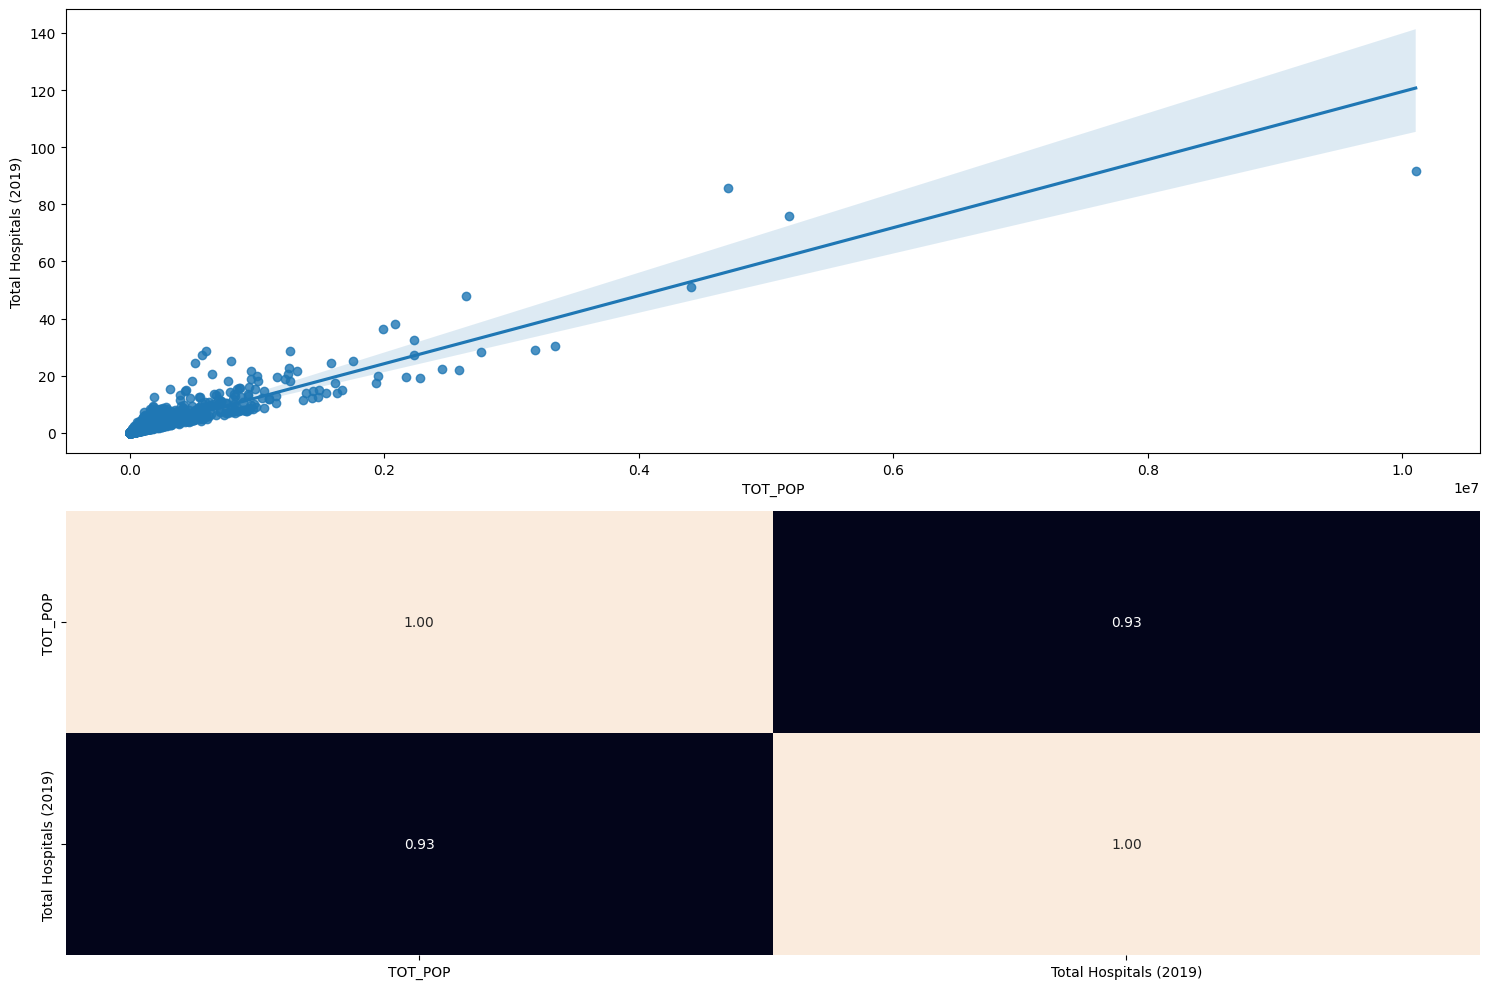

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (15, 10))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = df, x = "TOT_POP", y = "Total Hospitals (2019)")
sns.heatmap(df[["TOT_POP", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

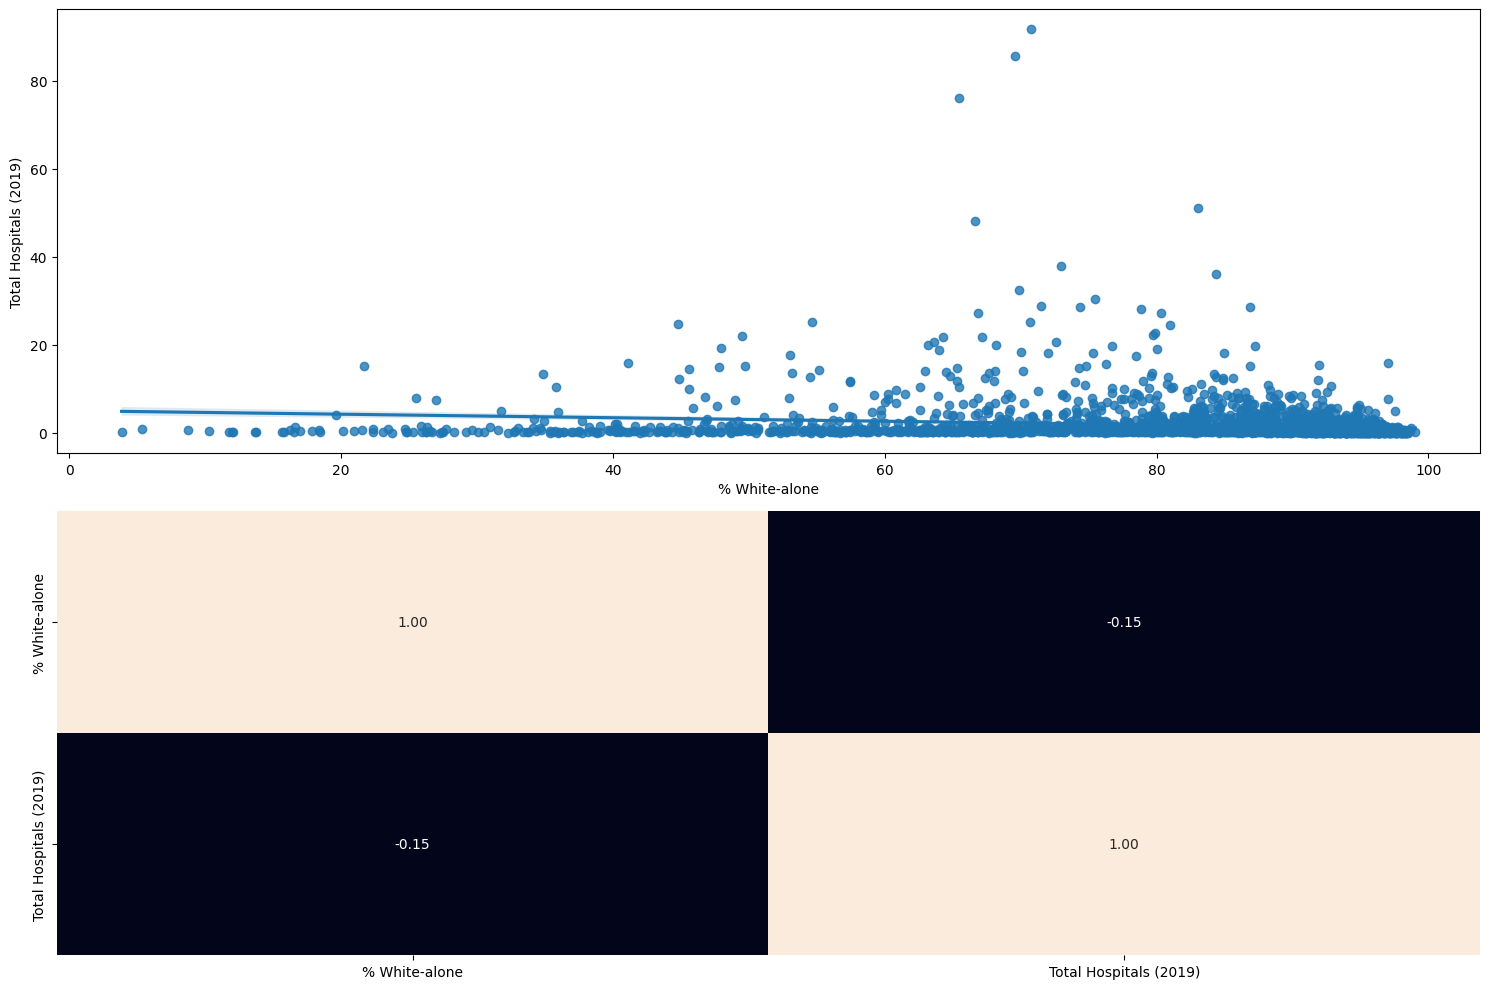

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (15, 10))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = df, x = "% White-alone", y = "Total Hospitals (2019)")
sns.heatmap(df[["% White-alone", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

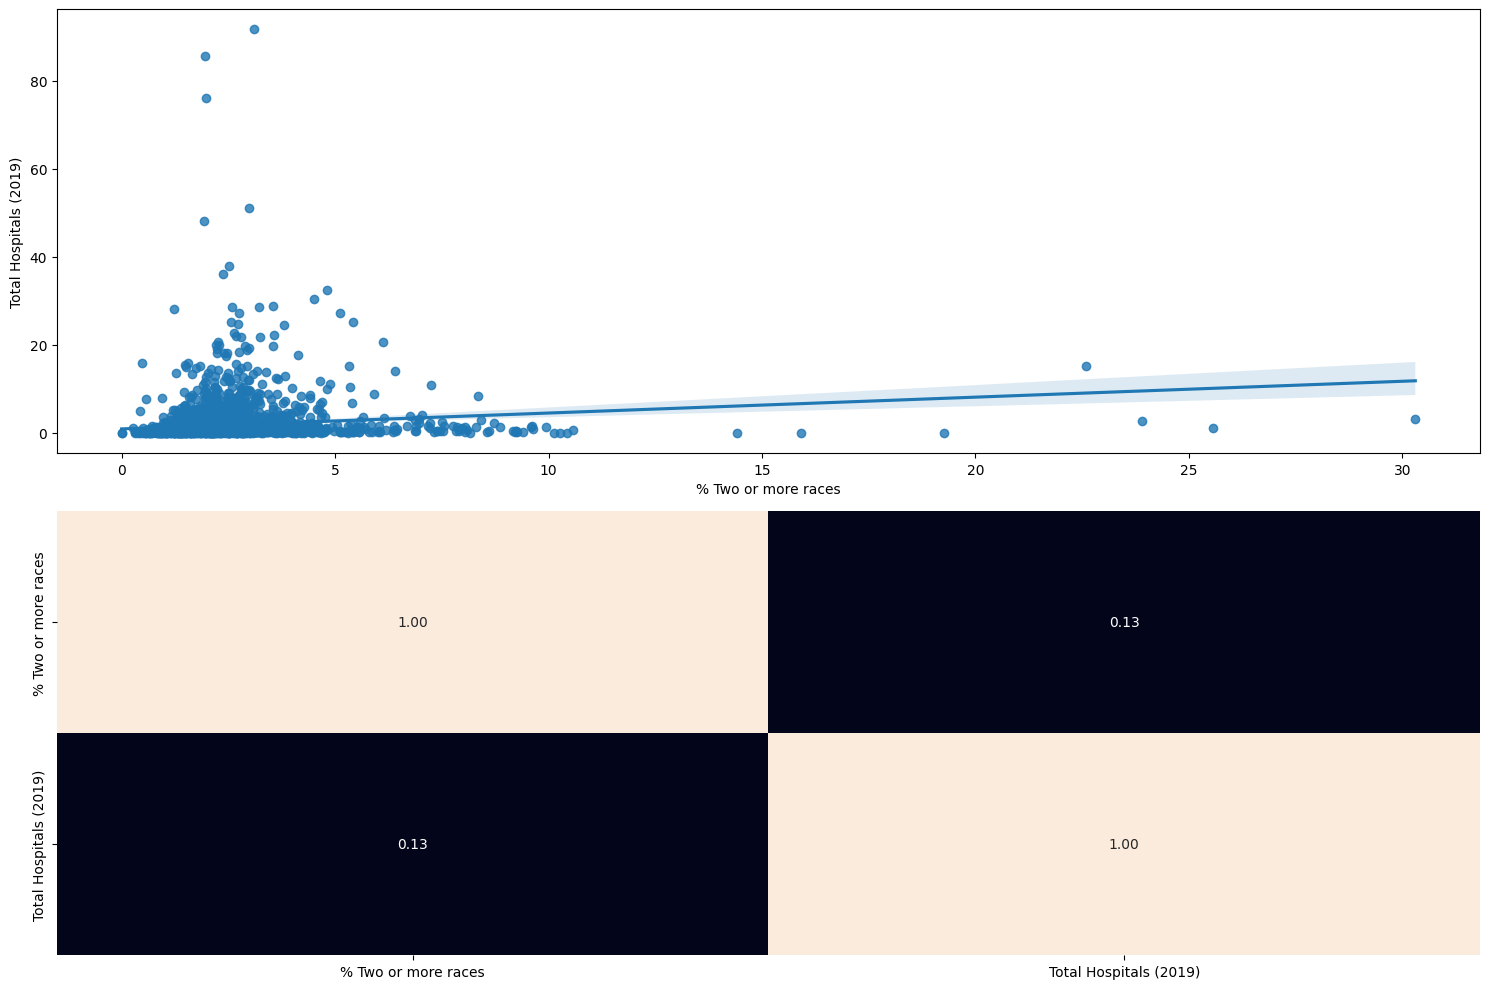

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (15, 10))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = df, x = "% Two or more races", y = "Total Hospitals (2019)")
sns.heatmap(df[["% Two or more races", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

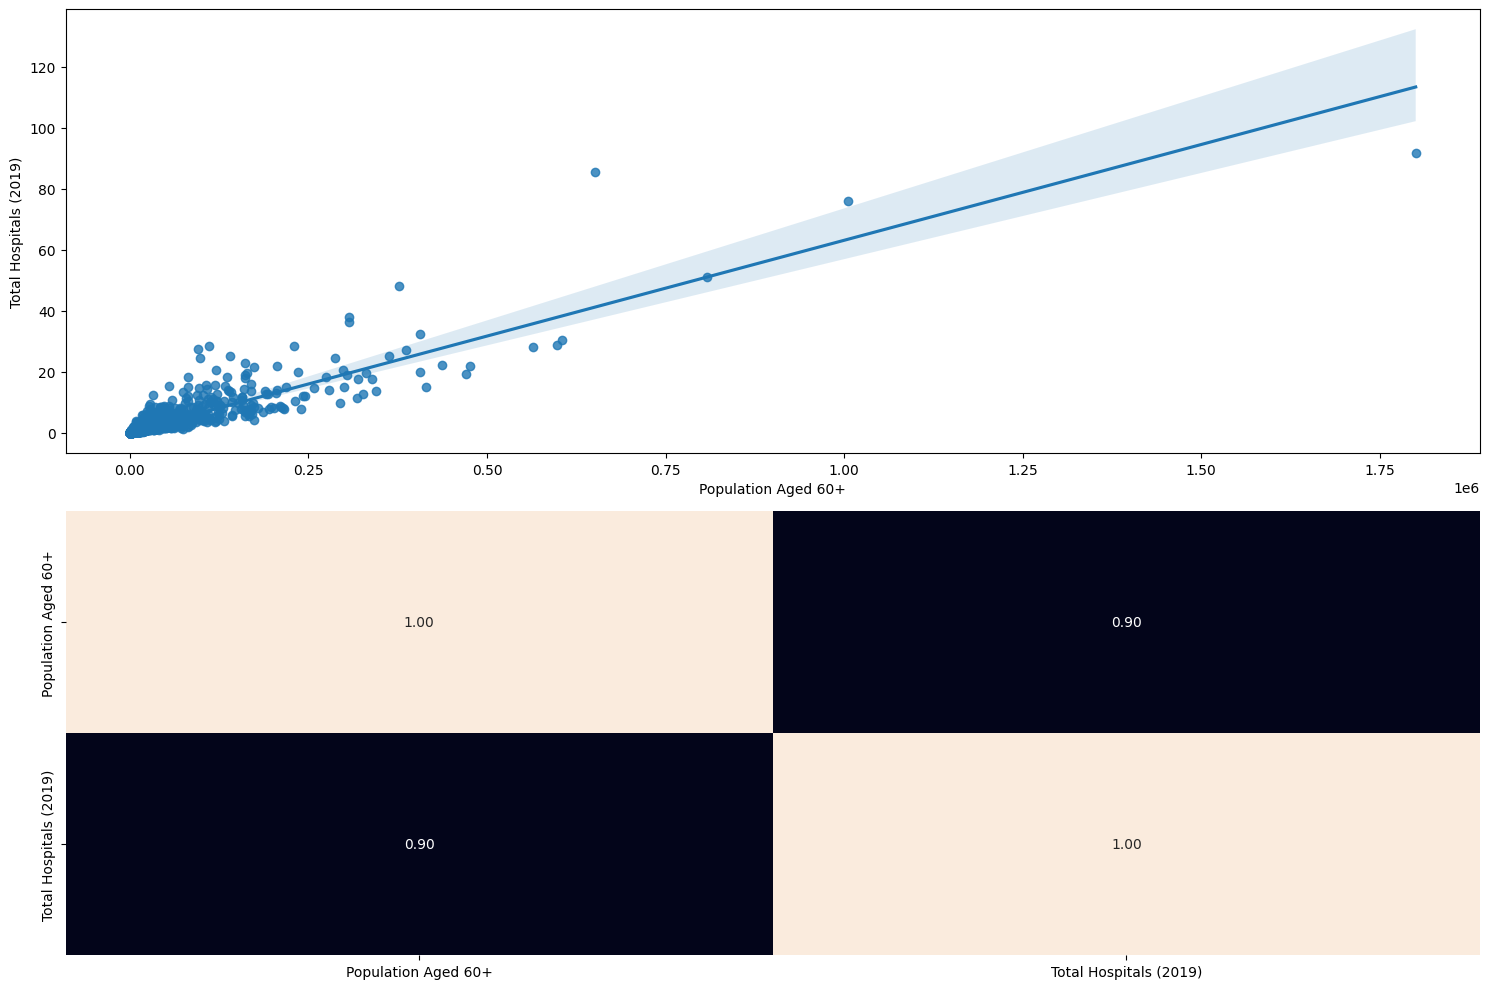

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (15, 10))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = df, x = "Population Aged 60+", y = "Total Hospitals (2019)")
sns.heatmap(df[["Population Aged 60+", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

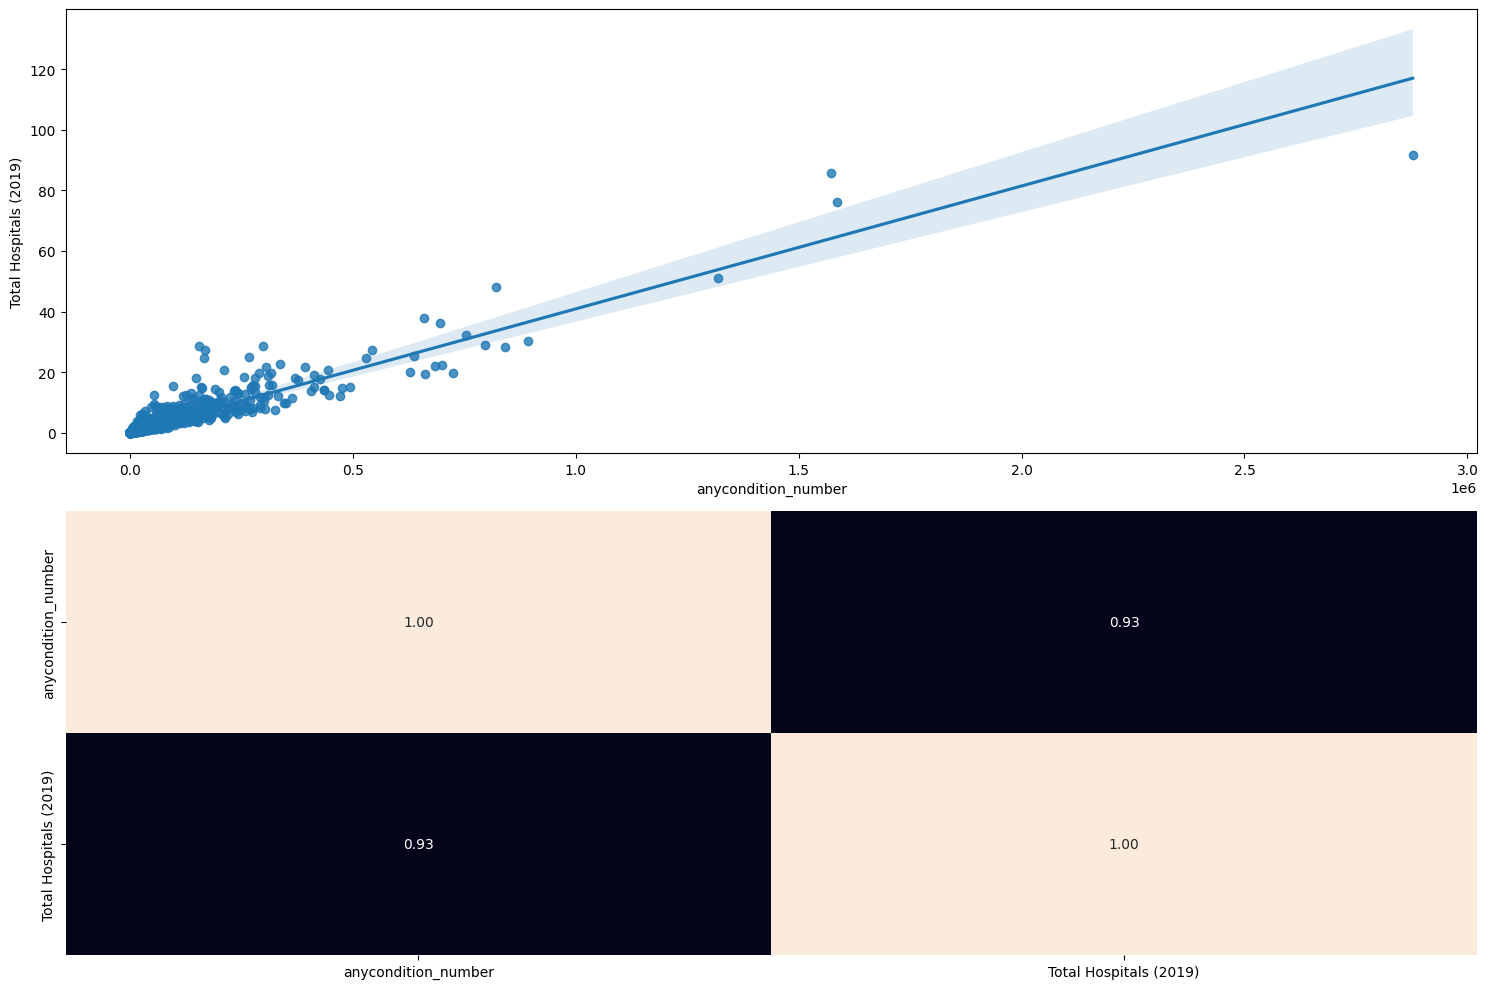

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (15, 10))
#total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = df, x = "anycondition_number", y = "Total Hospitals (2019)")
sns.heatmap(df[["anycondition_number", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

## Análisis multivarible

In [190]:
import seaborn as sns

#sns.pairplot(df)


In [191]:
normalized_data.shape

(3140, 16)

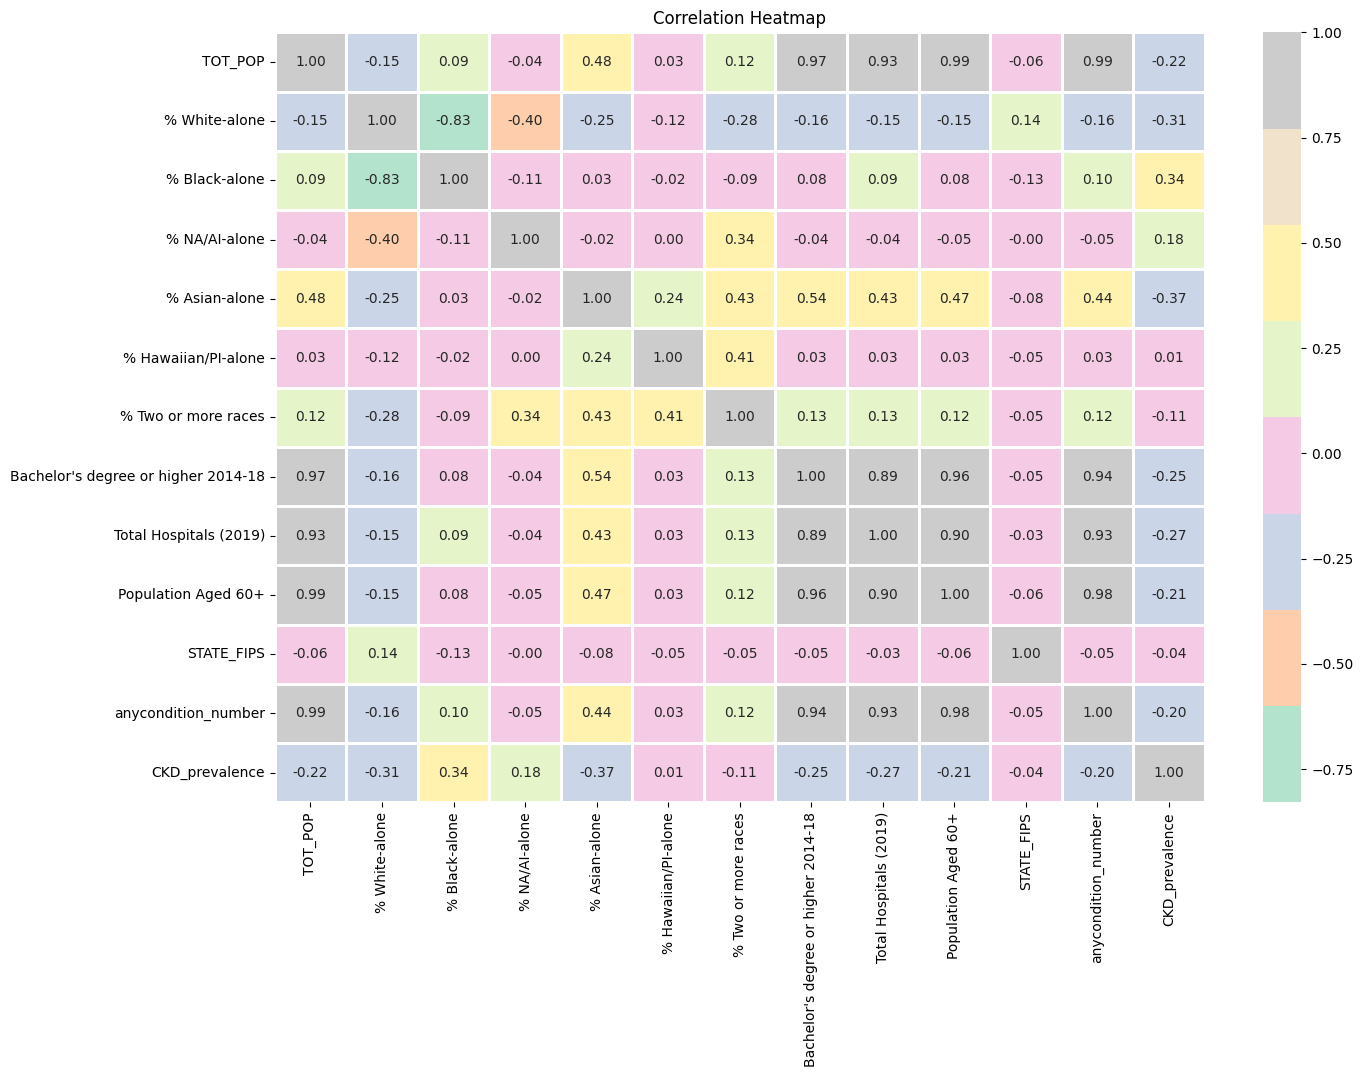

In [192]:
# Esta parte corresponde a visualizar la correlación entre las variables.
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Análisis de outliers
En el análisis univariable se puede observar que hay varias variables con outliers, por lo que se verá si afecta la regresión:

<Axes: xlabel='Total Hospitals (2019)'>

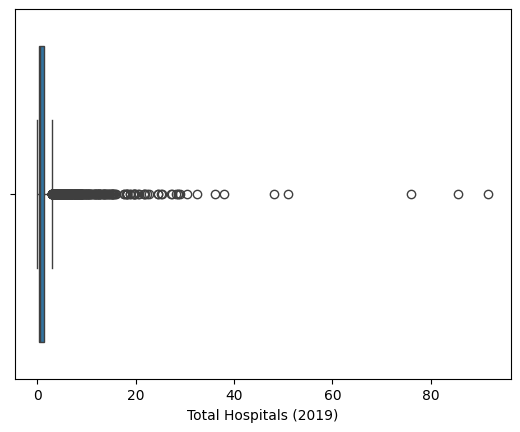

In [193]:
sns.boxplot(x=df["Total Hospitals (2019)"])

<Axes: xlabel='Population Aged 60+'>

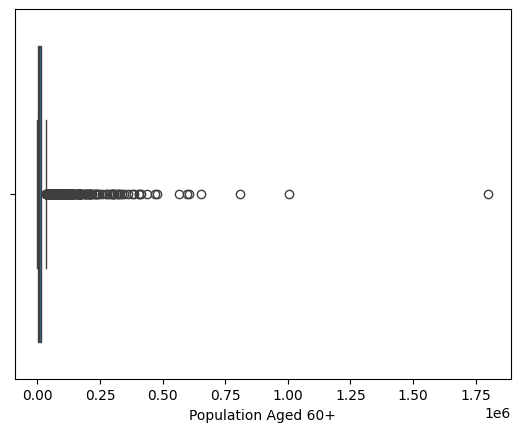

In [194]:
sns.boxplot(x=df["Population Aged 60+"])

<Axes: xlabel='% Two or more races'>

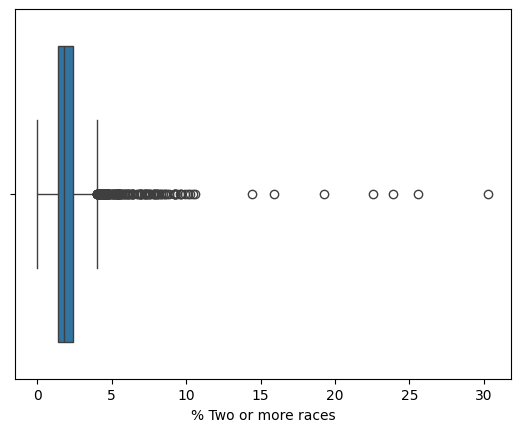

In [195]:
sns.boxplot(x=df["% Two or more races"])

<Axes: xlabel='STATE_FIPS'>

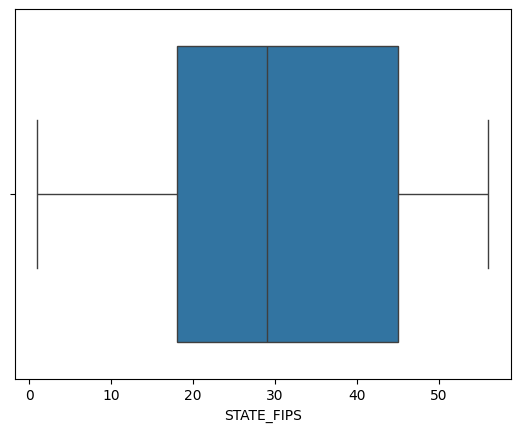

In [196]:
sns.boxplot(x=df["STATE_FIPS"])

Esta es una boxplot interesante, pues no hay outliers, lo que puede sugerir que entre estos código de estados se concentra la información disponible.

## Paso 3. Construir modelo de regresión lineal.

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = df.drop("Total Hospitals (2019)", axis = 1)
y = df["Total Hospitals (2019)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,TOT_POP,% NA/AI-alone,% Hawaiian/PI-alone,Bachelor's degree or higher 2014-18,Population Aged 60+,STATE_FIPS,anycondition_number
0,26625.0,1.607512,0.041315,3406.0,7218.0,26.0,10213.0
1,51266.0,0.212617,0.042913,6742.0,15253.0,42.0,19282.0
2,37779.0,0.357341,0.047646,3984.0,8058.0,18.0,14283.0
3,91984.0,13.483867,0.085885,14803.0,19479.0,40.0,33057.0
4,134487.0,0.778514,0.045358,19318.0,31227.0,26.0,49754.0


In [198]:
X_test_sel.head()


,TOT_POP,% NA/AI-alone,% Hawaiian/PI-alone,Bachelor's degree or higher 2014-18,Population Aged 60+,STATE_FIPS,anycondition_number
0,9038.0,0.486833,0.044258,1049.0,2400.0,51.0,3483.0
1,269805.0,1.730509,0.995163,58452.0,59433.0,53.0,85526.0
2,17408.0,0.746783,0.057445,851.0,3649.0,21.0,8737.0
3,117327.0,0.741517,0.036650,17640.0,24717.0,26.0,36873.0
4,225685.0,3.377717,0.315484,48346.0,47353.0,53.0,60192.0


In [199]:
X_train_sel["Total Hospitals (2019)"] = y_train.values
X_test_sel["Total Hospitals (2019)"] = y_test.values
X_train_sel.to_csv("../data/processed/medical_resources_train.csv", index = False)
X_test_sel.to_csv("../data/processed/medical_resources_test.csv", index = False)

In [200]:
medical_insurance_train_data = pd.read_csv("../data/processed/medical_resources_train.csv")
medical_insurance_test_data = pd.read_csv("../data/processed/medical_resources_test.csv")

medical_insurance_train_data.head()

,TOT_POP,% NA/AI-alone,% Hawaiian/PI-alone,Bachelor's degree or higher 2014-18,Population Aged 60+,STATE_FIPS,anycondition_number,Total Hospitals (2019)
0,26625.0,1.607512,0.041315,3406.0,7218.0,26.0,10213.0,0.383557
1,51266.0,0.212617,0.042913,6742.0,15253.0,42.0,19282.0,0.796587
2,37779.0,0.357341,0.047646,3984.0,8058.0,18.0,14283.0,0.745206
3,91984.0,13.483867,0.085885,14803.0,19479.0,40.0,33057.0,2.915995
4,134487.0,0.778514,0.045358,19318.0,31227.0,26.0,49754.0,1.937404


In [201]:
from sklearn.linear_model import LinearRegression

linear_regresion_model = LinearRegression()
linear_regresion_model.fit(X_train, y_train)

LinearRegression()

In [202]:
print(f"Intercepto (a): {linear_regresion_model.intercept_}")
print(f"Coeficientes (b): {linear_regresion_model.coef_}")

Intercepto (a): 3.4834462384155582
Coeficientes (b): [-1.78155918e-05 -1.39145231e-02 -1.44050941e-02 -1.16783148e-02
 -1.61690819e-02 -8.30268835e-03  6.44697022e-02  3.85306615e-05
 -6.68661490e-05 -2.83709126e-04  1.10955286e-04 -5.35902994e-01]


In [203]:
y_pred = linear_regresion_model.predict(X_test)
y_pred

array([ 2.53359318e-01,  4.01484506e+00,  2.97869588e-01,  1.65554906e+00,
        2.24077852e+00,  8.63094761e-01,  5.31512088e-01,  2.15479338e-01,
        4.75007341e-01,  1.22696420e+00,  5.96871866e-01,  7.61257825e-02,
        2.13948216e+00,  2.61256783e-01,  3.14039860e+00,  8.09247471e-01,
        1.76138465e+01,  4.18272738e-01,  4.32146153e-01,  4.26762283e-01,
        6.88080286e-01,  6.19184450e-01,  7.19826216e-01,  3.04758749e-01,
        3.49551160e+01,  1.18065475e+00,  1.04613401e+00,  4.67225209e-01,
        5.17348959e-01,  1.78527955e-01, -1.76571201e-01,  5.63385951e-01,
        6.98400171e-01,  7.82637515e-01,  2.19584641e+00,  5.94275667e-01,
        6.10740526e-01,  4.86364813e-01,  7.58812426e-01,  1.08291500e+00,
        1.50250371e-01,  4.60268525e+00,  3.47519979e-01,  4.00188776e-01,
        1.20438168e+00,  4.56324446e-01,  3.05867003e-01,  1.05815455e+00,
        2.67646262e-02,  3.30910944e-02,  1.23881804e+00, -9.97291154e-01,
        9.55088895e-01,  

In [204]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 1.5451111886549471
Coeficiente de determinación: 0.8295353051962686


In [205]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
normalized_data_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalized_data_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

print(normalized_data_train)

       TOT_POP  % White-alone  % Black-alone  % NA/AI-alone  % Asian-alone  \
0     0.002626       0.957623       0.014706       0.017376       0.007782   
1     0.005064       0.976818       0.013439       0.002298       0.010490   
2     0.003730       0.938718       0.044132       0.003863       0.024281   
3     0.009094       0.746091       0.014841       0.145748       0.034675   
4     0.013300       0.812971       0.129621       0.008415       0.069696   
...        ...            ...            ...            ...            ...   
2507  0.004202       0.965371       0.010102       0.005842       0.029105   
2508  0.005536       0.912110       0.063825       0.003858       0.030457   
2509  0.003301       0.685498       0.327053       0.004783       0.011835   
2510  0.000565       0.967301       0.003809       0.016228       0.015668   
2511  0.000875       0.962522       0.021600       0.005326       0.020859   

      % Hawaiian/PI-alone  % Two or more races  \
0            

In [206]:
y_test

2893    0.101864
2968    3.293977
1064    0.409059
1231    1.690199
2987    2.755327
          ...   
1351    0.644916
670     0.084246
2283    0.636573
2482    1.657985
2650    0.831662
Name: Total Hospitals (2019), Length: 628, dtype: float64

In [207]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model = Lasso(alpha = 0.0, max_iter = 300)

lasso_model.fit(normalized_data_train, y_train)

y_pred_lasso = lasso_model.predict(normalized_data_test)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.258e+03, tolerance: 5.210e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [208]:
from sklearn.metrics import r2_score
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso)}")


Coeficiente de determinación: -0.30914726794005576


In [209]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model_1 = Lasso(alpha = 1.0, max_iter = 300)

lasso_model_1.fit(normalized_data_train, y_train)

y_pred_lasso_1 = lasso_model_1.predict(normalized_data_test)

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso_1)}")

Coeficiente de determinación: -0.014536972194118647


In [210]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model_2 = Lasso(alpha = 2.0, max_iter = 300)

lasso_model_2.fit(normalized_data_train, y_train)

y_pred_lasso_2 = lasso_model_2.predict(normalized_data_test)

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso_2)}")

Coeficiente de determinación: -0.014536972194118647


In [211]:
lasso_model_3 = Lasso(alpha = 18.0, max_iter = 300)

lasso_model_3.fit(normalized_data_train, y_train)

y_pred_lasso_3 = lasso_model_3.predict(normalized_data_test)

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso_3)}")

Coeficiente de determinación: -0.014536972194118647


In [212]:
lasso_model_4 = Lasso(alpha = 20.0, max_iter = 300)

lasso_model_4.fit(normalized_data_train, y_train)

y_pred_lasso_4 = lasso_model_4.predict(normalized_data_test)

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso_4)}")

Coeficiente de determinación: -0.014536972194118647


Interpretación: 
Como se observa en el cálculo del coeficiente de determinación no se observa una mejora, lo que significa que: 
- no hay realmente sobreajuste que corregir
- alpha puede ser muy alto y esta obligando a muchos coeficientes a que sean cero

Así que, para confirmar lo anterior, se busca el mejor valor de alpha:

In [213]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5).fit(normalized_data_train, y_train)
print("Mejor alpha:", lasso_cv.alpha_)
print("R2:", lasso_cv.score(normalized_data_test, y_test))

Mejor alpha: 0.00016024071652071193
R2: -0.301858380353317


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+01, tolerance: 5.210e+00
  model = cd_fast.enet_coordinate_descent(
